# Geothermal Datathon 2021
---

<img src="../figures/the_roaring_kitties_logo.png" width="200" align="center">

Team members:
- **Ricardo Lara**
- **Artur Davletshin**
- **Aigul Akberova**
- **Sercan Gul**
- **Hakki Aydin**
- **Jose Hernandez**


---

### Import Modules

In [1]:
import pandas as pd
import numpy as np
import missingno as msno
import matplotlib.pyplot as plt
import lasio 
import os
import missingno as msno

### Define functions

In [2]:
DV = pd.read_csv('tidy data/Duvernay_Temperatures.csv')
EV = pd.read_csv('tidy data/Eaglebine_Temperatures.csv')

DV_UWIs = list(DV.UWI)
EB_UWIs = list(EV.UWI.astype(str))

## Load LAS files

In [3]:
folder = "../data/Clean_LAS/"
all_files = os.listdir(folder)

las = []
# %%
for i, filename in enumerate(all_files):
    las.append(lasio.read(folder+filename))


In [4]:
las_dfs = {}
UWIs = []
for i, l in enumerate(las):
    UWI = l.well.UWI.value
    
    if UWI not in UWIs:
        UWIs.append(UWI)
        las_dfs[UWI] = l.df()
        las_dfs[UWI]['UWI'] = UWI
    else:
        las_dfs[UWI] = las_dfs[UWI].merge(l.df(), how='left', on='DEPT')


Separate the well logs into daframes for Duvernay and Eaglebine

In [5]:
DV_dfs = [df for i,df in las_dfs.items() if i in DV_UWIs]
EB_dfs = [df for i,df in las_dfs.items() if i in EB_UWIs]

Get all well log names and parameters

In [6]:
DV_curves = {}
EB_curves = {}

for i, l in enumerate(las):
    UWI = l.well.UWI.value
    
    keys = l.sections['Curves'].keys()

    for key in keys:
        curve = l.sections['Curves'][key]
        descr = curve.descr
        unit = curve.unit
       
        if UWI in EB_UWIs and key not in EB_curves.keys():
            EB_curves[key] = [unit, descr]
        elif UWI in DV_UWIs and key not in DV_curves.keys():
            DV_curves[key] = [unit, descr]


Collect all the well logs' names

In [7]:
log_names = {}

In [8]:
log_names['GR'] = [ 
 'GRSED',           # GAMMA RAY FROM SONIC LOG
 'GRWS',            # GAMMA RAY [GRSED]
 'GRS',             # GAMMA RAY FROM SONIC LOG
 'GRRED',           # GAMMA RAY FROM RESISTIVITY LOG
 'GRR',             # GAMMA RAY FROM RESISTIVITY LOG
 'GRDED',           # GAMMA RAY FROM DENSITY LOG [ADJ. TO RESISTIVITY LOG]
 'GRD',             # GAMMA RAY FROM DENSITY LOG
 'SGR',             # SMOOTHED GAMMA RAY COMBINED FROM CND LOG
 'GRNED',           # GAMMA RAY FROM GRN LOG
 'GRN',             # GAMMA RAY FROM GRN LOG
 'GRED',            # GAMMA RAY FROM CBL LOG [ADJ TO SPRED]
 'GR',              # GAMMA RAY
 'CGRED',           # COMPUTED GAMMA RAY FROM GR LOG [CASED HOLE]
 'CGR',             # CORRECTED GAMMA RAY FROM GR LOG [CASEDHOLE]
 'GR_2',            # GAMMA RAY
 'GR_1',            # GAMMA RAY
 'SGRDDED',         # GAMMA RAY FROM DENSITY LOG [ADJ. TO RESISTIVITY LOG]
 'SGRDD',           # GAMMA RAY FROM DENSITY LOG
 'GRD1ED',          # GAMMA RAY FROM SYNGENETIC LOG [ADJ. TO RESISTIVITY LOG]
 'GRD_1',           # GAMMA RAY FROM DENSITY LOG
 'GR1ED',           # GAMMA RAY FROM GR LOG [ADJ. TO IEL LOG]
 'CGRDED',          # GAMMA RAY FROM DENSITY LOG
 'SGRDED',          # GAMMA RAY FROM DENSITY LOG
 'CGRD',            # CORRECTED GAMMA RAY FROM DENSITY LOG
 'SGRD',            # GAMMA RAY FROM DENSITY LOG
 'GRN1ED',          # GAMMA RAY FROM CNL LOG
 'GRN2ED',          # GAMMA RAY FROM CNL LOG
 'GRN_1',           # GAMMA RAY FROM CNL LOG
 'GRN_2',           # GAMMA RAY FROM CNL LOG
 'GRMED',           # GAMMA RAY FROM MICRO LATEROLOG [ADJ.TO DIFL LOG]
 'GRM',             # GAMMA RAY FROM MICRO LATEROLOG
 'GRTED',           # THEORETICAL GAMMA RAY VALUE TDT FROM TDT LOG 
 'GRT',             # THEORETICAL GAMMA RAY VALUE TDT FROM TDT LOG
 'GRDRED',          # GAMMA RAY [FROM REPEAT SECTION] FROM DENSITY LOG 
 'GRSRED',          # GAMMA RAY [FROM REPEAT SECTION] FROM SONIC LOG
 'GRD_R',           # GAMMA RAY FROM DENSITY LOG FROM REPEAT
 'GRS_R',           # GAMMA RAY FROM SONIC LOG FROM REPEAT
 'GRS1ED',          # GAMMA RAY FROM SONIC LOG (DRESSER ATLAS), 
 'GRS1',            # GAMMA RAY FROM SONIC,  LOG SERVICE DRESSER ATLAS
 'GRS_1',           # GAMMA RAY FROM ARRAY SONIC LOG
 'GRR1ED',          # GAMMA RAY FROM DLL LOG [ADJ. TO DILSFL LOG]
 'GRRRED',          # GAMMA RAY FROM DILSFL LOG ( REPEAT SECTION) [ADJ. TO GRRED]D]
 'GRR_1',           # GAMMA RAY FROM RESISTIVITY LOG
 'GRR_R',           # GAMMA RAY FROM RESISTIVITY LOG FROM REPEAT
 'GR_D3',           # GAMMA RAY FROM CCL TEMP LOG
 'GRD1',            # GAMMA RAY FROM CNFD LOG
 'GRN1',            # GAMMA RAY FROM MICROLOG
 'GRR_1ED',         # GAMMA RAY FROM DILSFL LOG
 'GRN2',            # GAMMA RAY
 'GRN3',            # GAMMA RAY
 'GRR1',            # GAMMA RAY FROM INDICTION [ILD] LOG
 'GRAX',            # GAMMA RAY [MWD] FROM LWD LOG
 'GRAXED']          # GAMMA RAY [MWD] FROM LWD LOG


In [9]:
log_names['NPHI_SS'] =[ 
 'NPORSSED',    # NEUTRON POROSITY SANDSTONE FROM DENSITY LOG         
 'NPOR_SS',     # NEUTRON POROSITY SANDSTONE FROM DENSITY LOG         
 'NPHISSED',    # NEUTRON POROSITY SANDSTONE FROM DENSITY LOG 
 'NPHI_SS',     # NEUTRON POROSITY SANDSTONE         
 'NPHISS',      # NEUTRON POROSITY SANDSTONE     
 'NPOSSWS',     # NEUTRON POROSITY SANDSTONE [NPORSSED]         
 'CNCSSED',     # NEUTRON POROSITY SANDSTONE FROM DENSITY LOG         
 'CNC_SS',      # NEUTRON POROSITY SANDSTONE FROM DENSITY LOG     
 'NPORSS',      # NEUTRON POROSITY SANDSTONE FROM DENSITY LOG     
 'NPHISS1ED',   # NEUTRON POROSITY SANDSTONE FROM CNL LOG         
 'NPHI_SS_1',   # NEUTRON POROSITY SANDSTONE FROM CNL LOG         
 'CNSSED',      # NEUTRON POROSITY SANDSTONE FROM DENSITY LOG 
 'CN_SS',       # COMPENSATED NEUTRON POROSITY SANDSTONE     
 'CNSSS',       # COMPENSATED NEUTRON POROSITY SANDSTONE     
 'NPHI_SS1',    # NEUTRON POROSITY SANDSTONE FROM CNFD LOG         
 'NPHI_SSED',   # NEUTRON POROSITY SANDSTONE (ADJ TO RES.)         
 'CNLSSED',     # COMPENSATED NEUTRON POROSITY SANDSTONE FROM DENSITY LOG      
 'CNL_SS',      # COMPENSATED NEUTRON POROSITY SANDSTONE     
 'TNPHSSED',    # THERMAL NEUTRON POROSITY SANDSTONE FROM LWD LOG         
 'CNC',         # NEUTRON POROSITY SANDSTONE     
 'CNCED',       # NEUTRON POROSITY SANDSTONE FROM DENSITY LOG [ADJ TO GRRED]   
 'CNS',         # NEUTRON POROSITY SANDSTONE FROM CSG TO 7252; LIMESTONE FROM 7252 TO TD     

                    ]

In [10]:
log_names['NPHI_LS'] = [
'NPHILSED',     # NEUTRON POROSITY LIMESTONE FROM DENSITY LOG [ADJ. TO RESISTIVITY LOG]    
'NPHI_LS',      # NEUTRON POROSITY LIMESTONE    
'NPORLSED',     # NEUTRON POROSITY LIMESTONE FROM DENSITY LOG [ADJ. TO RESISTIVITY LOG]    
'NPOR_LS',      # NEUTRON POROSITY LIMESTONE FROM DENSITY LOG    
'NPHILS',       # NEUTRON POROSITY LIMESTONE    
'SNPLSED',      # SIDEWALL NEUTRON POROSITY LIMESTONE FROM SNP LOG [ADJ. TO RESISTIVITY LOG]    
'SNP_LS',       # SIDEWALL NEUTRON POROSITY LIMESTONE FROM SNP LOG    
'NPOWS',        # NEUTRON POROSITY LIMESTONE [CONVERTED NPHISSED TO LIMESTONE SPL WITH NPHILSED 
'NPORLS',       # NEUTRON POROSITY LIMESTONE FROM DENSITY LOG    
'CNSLSED',      # NEUTRON POROSITY LIMESTONE FROM DENSITY LOG    
'CNCLSED',      # COMPENSATED NEUTRON POROSITY LIMESTONE FROM DENSITY LOG 
'CNC_LS',       # COMPENSATED NEUTRON POROSITY LIMESTONE FROM DENSITY LOG    
'CNLSED',       # NEUTRON POROSITY LIMESTONE FROM DENSITY LOG [ADJ. TO RESISTIVITY LOG]    
'CN_LS',        # COMPENSATED NEUTRON POROSITY LIMESTONE    
'NPHILSRED',    # NEUTRON POROSITY LIMESTONE FROM DENSITY LOG ( REPEAT SECTION) 
'NPHI_LS_R',    # NEUTRON POROSITY LIMESTONE REPEAT LOG        
'CNSLS',        # COMPENSATED NEUTRON POROSITY LIMESTONE    
'NPHI_LSED',    # NEUTRON POROSITY LIMESTONE (ADJ TO RES.)        
'CNLLSED',      # NEUTRON POROSITY LIMESTONE [M=2710,F=1000] FROM DENSITY LOG 
'CNL_LS',       # NEUTRON POROSITY LIMESTONE [M=2710,F=1000] FROM DENSITY LOG    
'CNCF_LS',      # NEUTRON POROSITY LIMESTONE FROM HDI/CD/CN LOG    
'CNCFLSED',     # NEUTRON POROSITY LIMESTONE FROM HDI/CD/CN LOG    
'CNCFED',       # NEUTRON POROSITY LIMESTONE    
'TNPHED',       # THERMAL NEUTRON POROSITY LIMESTONE FROM DENSITY LOG
]          

In [11]:
log_names['DPHI_SS'] = [
'DPHISS',      # DENSITY POROSITY SANDSTONE     
  'DPORSS',      # DENSITY POROSITY SANDSTONE FROM DENSITY LOG     
  'DPHZSS',      # DENSITY POROSITY SANDSTONE FROM DENSITY LOG     
  'PORDSSED',    # DENSITY POROSITY SANDSTONE [M=2650, F=1000] FROM DENSITY LOG [ADJ. TO RESISTIVITY LOG]     
  'PORD_SS',     # DENSITY POROSITY SANDSTONE [M=2650, F=1000] FROM DENSITY LOG     
  'CDLSSED',     # DENSITY POROSITY SANDSTONE [M=2650,F=1000] FROM DENSITY LOG [ADJ. TO RESISTIVITY LOG]     
  'CDL_SS',      # DENSITY POROSITY SANDSTONE [M=2650,F=1000] FROM DENSITY LOG     
  'DPOR_SS',     # DENSITY POROSITY SANDSTONE     
  'DPOSSED',     # LDS DENSITY POROSITY SANDSTONE     
  'CDLSS',       # COMPENSATED DENSITY POROSITY SANDSTONE     
  'DPHISS1ED',   # DENSITY POROSITY SANDSTONE [M=2.65,F=1.0] FROM CNFD LOG [AJ. TO RESISTIVITY LOG]         
  'DPHI_SS1',    # DENSITY POROSITY SANDSTONE [M=2.65,F=1.0] FROM CNFD LOG     
  'DPHI_SSED',   # DENSITY POROSITY SANDSTONE  (ADJ TO RES.)         
  'CDL',         # DENSITY POROSITY SANDSTONE FROM CSG TO 7252; LIMESTONE FROM 7252 TO TD 
  ]


In [12]:
log_names['DPHI_LS'] = [
                    'DPOLSWS',    # DENSITY POROSITY LIMESTONE [CONVERTED TO M=2710 F=1000]      
                    'DPHI_LS',    # DENSITY POROSITY LIMESTONE      
                    'DPHILS',     # DENSITY POROSITY LIMESTONE  
                    'CDLLSED',    # COMPENSATED DENSITY POROSITY LIMESTONE [M=2710, F=1000] FROM DENSITY LOG
                    'DPHI_LS_R',  # DENSITY POROSITY LIMESTONE REPEAT LOG      
                    'CDLLS',      # COMPENSATED DENSITY POROSITY LIMESTONE  
                    'DPHI_LSED',  # DENSITY POROSITY LIMESTONE  (ADJ TO RES.)      
                    'DPHZ',       # DENSITY POROSITY LIMESTONE  
                    ]

In [13]:
log_names['PEFZ'] =[
                    'PEED',    # PHOTOELECTRIC FACTOR FROM DENSITY LOG     
                    'PEFWS',   # PHOTOELECTRIC FACTOR [PEED]         
                    'PEFED',   # PHOTOELECTRIC FACTOR  FROM PISFL-LDT-CNL LOG         
                    'PEFZ',    # HILT PHOTOELECTRIC FACTOR     
                    'PEFZED',  # PHOTOELECTRIC FACTOR STANDARD RESOLUTION FROM DENSITY LOG         
                    'PEFS',    # SHORT SPACED CORRECTED PHOTOELECTRIC FACTOR     
                    'PEFSED',  # SHORT SPACED CORRECTED PHOTOELECTRIC FACTOR FROM HOSTILE LDL-CN-GR LOG         
                    ]

In [14]:
log_names['RHOB'] = [
                    'RHOMED',       # CORRECTED BULK DENSITY FROM HOSTILE LDL-CN-GR LOG 
                    'RHOM',         # CORRECTED BULK DENSITY            
                    'DEN',          # COMPENSATED BULK DENSITY   
                    'RHOB',         # BULK DENSITY   
                    'DENWS',        # BULK DENSITY  (RHOBED LS)       
                    'RHOBED',       # BULK DENSITY (ADJ TO RES.)       
                    'DENED',        # BULK DENSITY FROM DENSITY LOG [ADJ TO GRRED]       
                    ]

In [15]:
log_names['SP'] = [
                    'SPR',       # SPONTANEOUS POTENTIAL FROM RES.   
                    'SPWS',      # SPONTANEOUS POTENTIAL BASELINE 0 MV (SPRED)   
                    'SPRED',     # SPONTANEOUS POTENTIAL FROM RESISTIVITY       
                    'SP',        # SPONTANEOUS POTENTIAL FROM DUAL INDUCTION LOG   
                    'SPED',      # SPONTANEOUS POTENTIAL [BASELINE 0 MV] FROM RESISTIVITY LOG   
                    'SPS',       # SPONTANEOUS POTENTIAL FROM SONIC   
                    'SPSED',     # SPONTANEOUS POTENTIAL FROM SONIC LOG       
                    'SPM',       # SPONTANEOUS POTENTIAL FROM MICROLOGLOG   
                    'SPMED',     # SPONTANEOUS POTENTIAL FROM MICROLOGLOG [AJD TO SPRED]       
                    ]

In [16]:
log_names['CAL'] = [k for k,v in EB_curves.items() if 'CALIPER' in v[1]]

Merge well logs

In [17]:
EB2_dfs = []
for df in EB_dfs:
    df2 = df[['UWI']].copy(deep=True)
    df2[list(log_names.keys())] = np.NAN

    for log, names in log_names.items():
        columns = df.columns.to_list()
        col_names = [x for x in names if x in columns]

        for col in col_names:
            df2[log].mask(df2[log].isnull(), df[col], inplace=True)
    EB2_dfs.append(df2)


In [18]:
DVlogs = pd.read_csv('tidy data/Duvernay_well_logs.csv')
EBlogs = pd.read_csv('tidy data/Eaglebine_well_logs.csv')

EBlogs['UWI'] = EBlogs['UWI'].astype('str')
DVlogs['UWI'] = DVlogs['UWI'].astype('str')

In [19]:
EB3_dfs = []
for df in EB2_dfs:
    df2 = df.merge(EBlogs[['UWI', 'RDEP', 'RMED', 'RSHA']], on='UWI', how='left')
    EB3_dfs.append(df2)

In [33]:
for df in EB2_dfs:
    UWI = df.UWI.values[0]
    df.to_csv('tidy data/Eaglebine Well Logs/'+UWI+'.csv')

In [34]:
EB2m = pd.concat(EB2_dfs, axis=0)
EB2m.to_csv('tidy data/EB_well_logs.csv')

In [ ]:
msno.matrix(EB2m)

In [23]:
DV2_dfs = []
for df in DV_dfs:
    df2 = df[['UWI']].copy(deep=True)
    df2[list(log_names.keys())] = np.NAN

    for log, names in log_names.items():
        columns = df.columns.to_list()
        col_names = [x for x in names if x in columns]

        for col in col_names:
            df2[log].mask(df2[log].isnull(), df[col], inplace=True)
    DV2_dfs.append(df2)

In [24]:
len(DV2_dfs)

512

In [26]:
len(DVlogs.UWI.unique())

512

In [27]:
DV3_dfs = []
for df in DV2_dfs:
    df2 = df.merge(DVlogs[['UWI', 'RDEP', 'RMED', 'RSHA']], on='UWI', how='left')
    DV3_dfs.append(df2)

In [32]:
for df in DV2_dfs:
    UWI = df.UWI.values[0]
    df.to_csv('tidy data/Duvernay Well Logs/'+UWI+'.csv')

In [36]:
DV2m = pd.concat(DV2_dfs, axis=0)
DV2m.to_csv('tidy data/DV_well_logs.csv')

<AxesSubplot:>

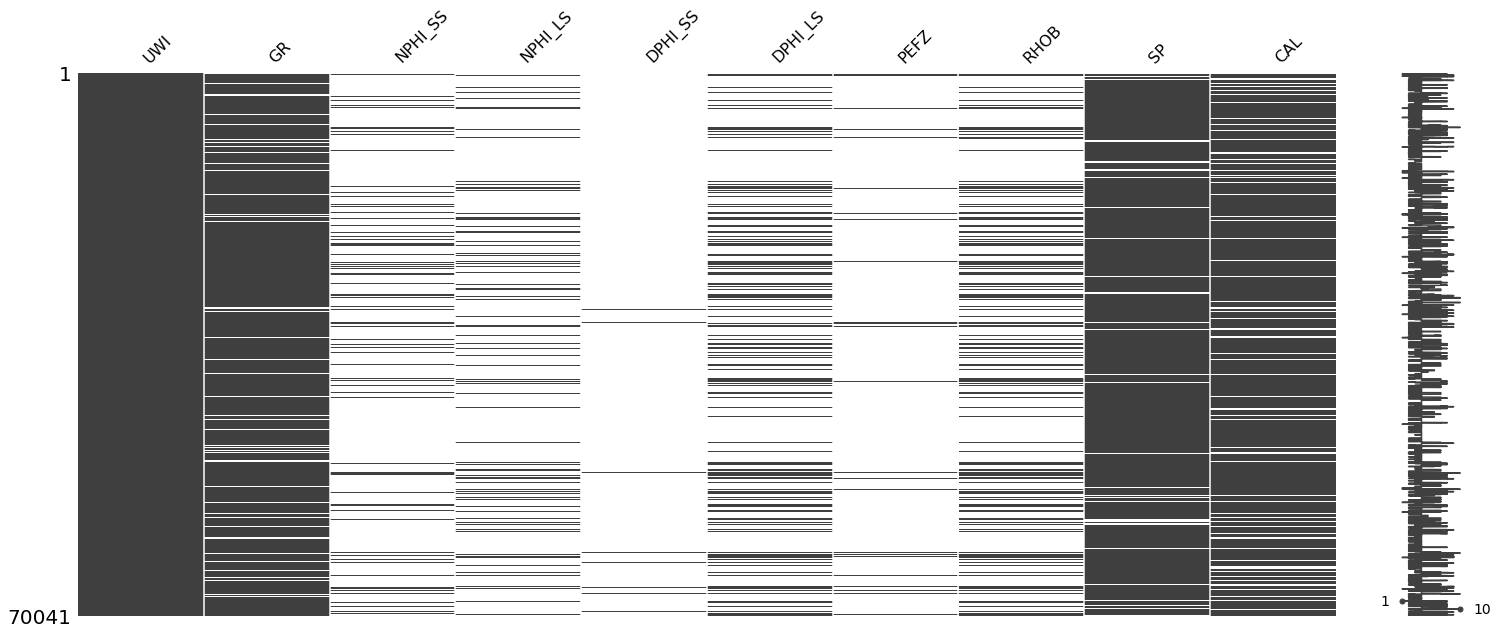

In [37]:
msno.matrix(DV2m)

In [ ]:
len(DV2m.UWI.unique())